# **Mini-Project 1: Machine Learning CP322A**

### **Datasets 3 and 4:** pick two additional datasets for classification from the UCI datasets at:


In [58]:
#imports
import numpy as np
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
import statistics
from regression import LogReg

#### **Task 1:** Acquire, preprocess, and analyze the data

In [59]:
iris = fetch_ucirepo(id=53) 
# print(iris.metadata) 
# print(iris.variables)
  
features = iris.data.features 
targets = iris.data.targets 
  
features.to_csv('features.csv', index=False)
targets.to_csv('targets.csv', index=False)

print(features)
print(targets) 


     sepal length  sepal width  petal length  petal width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]
              class
0       Iris-setosa
1       Iris-setosa
2       Iris-setosa
3       Iris-setosa
4       Iris-setosa
..              ...
145  Iris-virginica
146  Iris-virginica
147  Iris-virginica
148  Iris-virginica
149  Iris-virginica

[150 rows x 1 columns]


In [60]:
# 1. Load the data sets into NumPy objects(i.e.,arrays or matrices)in Python.
features_array = np.array(iris.data.features)
targets_array = np.array(iris.data.targets)

print(features_array)
print(targets_array)

#2. Cleaning the data, missing or malformed features, one-hot encoding

# np.isnan(features) #checks for missing data

# Breaking up the data for features into their coloums for easy use later on
feature_names = features.columns  # Get the column names

sepal_length = features[[feature_names[0]]]
sepal_width = features[[feature_names[1]]]
petal_length = features[[feature_names[2]]]
petal_width = features[[feature_names[3]]]

# print(petal_width)


[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [61]:
#3. Compute basic statistics on the data to understand it better, positive vs. negative classes, distributions of some of the numerical features. what are the correlations between the features? how do the scatter plots of pair-wise features look like for some subset of features?

mean_sepal_length  = np.mean(sepal_length)
mean_sepal_width = np.mean(sepal_width)
mean_petal_length = np.mean(petal_length)
mean_petal_width = np.mean(petal_width)

median_sepal_width = np.median(sepal_width)
median_petal_length = np.median(petal_length)
median_petal_width = np.median(petal_width)

print("Averages (cm)")
print(f"Sepal length: {mean_sepal_length:.2f}")
print(f"Mean Sepal Width: {mean_sepal_width:.2f}")
print(f"Mean Petal Length: {mean_petal_length:.2f}")
print(f"Mean Petal Width: {mean_petal_width:.2f}")

print("\nMedian (cm)")
print(f"Median Sepal Width: {median_sepal_width:.2f}")
print(f"Median Petal Length: {median_petal_length:.2f}")
print(f"Median Petal Width: {median_petal_width:.2f}")


Averages (cm)
Sepal length: 5.84
Mean Sepal Width: 3.05
Mean Petal Length: 3.76
Mean Petal Width: 1.20

Median (cm)
Median Sepal Width: 3.00
Median Petal Length: 4.35
Median Petal Width: 1.30


#### **Task 2:** Implement the models

I will focus on Implementing k-Nearest Neighbor (KNN), and finding the best K. Then we will apply this to the other data sets

In [62]:
Y=[]
j=2
i=0
sizeOfY =targets.shape[0]
sizeOfX =features.shape[1]
y=np.array(targets)
while i<len(y):
    if y[i]=='Iris-setosa':
        Y.append(1)
        i+=1
    else:
        Y.append(0)
        i+=1
        
y = np.array(Y) #(4601, 1)
X = np.array(features) #(4601, 57)

lr = LogReg(learning_rate=0.05, num_epochs=100)
losses = lr.fit(X, y)


accuracy = lr.evaluate_acc(X, y)
print(accuracy)



Epoch: 0, Loss: 0.6931471805599433
Epoch: 1, Loss: 0.6949773032606914
Epoch: 2, Loss: 0.5658800448625013
Epoch: 3, Loss: 0.5644771060275104
Epoch: 4, Loss: 0.5623356018302936
Epoch: 5, Loss: 0.5614922298384488
Epoch: 6, Loss: 0.560557361451764
Epoch: 7, Loss: 0.5600012544177956
Epoch: 8, Loss: 0.5594593694325175
Epoch: 9, Loss: 0.5590402089910707
Epoch: 10, Loss: 0.5586408199923715
Epoch: 11, Loss: 0.5582841321547547
Epoch: 12, Loss: 0.557939488428056
Epoch: 13, Loss: 0.5576105792300506
Epoch: 14, Loss: 0.557287809118387
Epoch: 15, Loss: 0.5569711628391223
Epoch: 16, Loss: 0.5566574822347623
Epoch: 17, Loss: 0.556346352025554
Epoch: 18, Loss: 0.5560366809324497
Epoch: 19, Loss: 0.5557281896957152
Epoch: 20, Loss: 0.5554204844965269
Epoch: 21, Loss: 0.5551134219701829
Epoch: 22, Loss: 0.5548068548449209
Epoch: 23, Loss: 0.5545007167194314
Epoch: 24, Loss: 0.554194950987669
Epoch: 25, Loss: 0.5538895283736863
Epoch: 26, Loss: 0.5535844266493406
Epoch: 27, Loss: 0.5532796331943937
Epoch: 

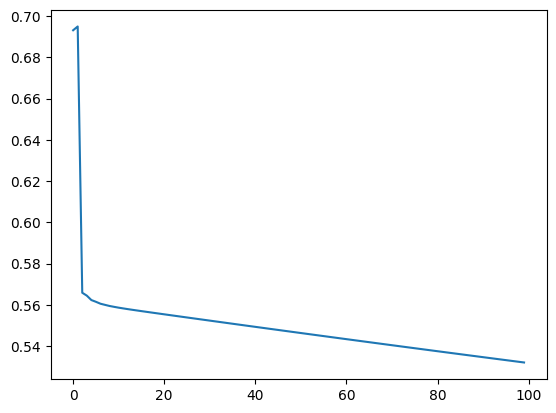

In [63]:
plt.plot(losses)